<a href="https://colab.research.google.com/github/AnnaAleynik/machine_learning/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

graph
2) минимальное дерево
3) без ребра (кластеры)

In [4]:
def init_graph(n): 
    matrix = np.zeros((n, n)) 
    for i in range(n): 
        for j in range(i + 1, n): 
            if np.random.randint(0, 2) == 1: 
                matrix[i][j] = matrix[j][i] = np.random.randint(0, 100) 
    return matrix 


In [5]:
def draw_graph(G):
  plt.figure(figsize=(12.0, 8.0))
  plt.axis('off')

  # matrix = init_not_random(n)
  pos = nx.spring_layout(G, seed=15) 
  # nx.draw_networkx(G, with_labels=True) 
  # nx.draw_networkx_edges(G, pos) 
  # nx.draw_networkx_nodes(G, pos) 
  edge_labels = nx.get_edge_attributes(G, "weight") 
  # nx.draw_networkx_labels(G, pos, node)
  nx.draw(
    G, pos, node_color='pink', width=1, linewidths=1,
    labels={node: node for node in G.nodes()}
  )
  nx.draw_networkx_edge_labels(G, pos, edge_labels) 
  plt.show() 

In [6]:
def find_nearest_node(matrix, nodes):
  min_dist = 1001
  nearest_node = (-1,-1)
  for node in nodes:
    for i in range(len(matrix[node])):
      if matrix[node][i] != 0 and matrix[node][i] < min_dist:
        min_dist = matrix[node][i]
        nearest_node = (node,i)
  for node in nodes:
      matrix[node][nearest_node[1]] = matrix[nearest_node[1]][node] = 0
  return nearest_node, min_dist

In [7]:
def find_min_edge(matrix):
  min_edge = 1000
  row, col = matrix.shape
  min_edge_nodes = (0,0)
  for i in range(col):
    for j in range(row):
      if matrix[i][j] != 0 and matrix[i][j] < min_edge:
        min_edge = matrix[i][j]
        min_edge_nodes = (i,j)
  return min_edge_nodes

In [8]:
def get_min_tree(data):
  matrix = np.copy(data)
  H = nx.Graph()
  nodes = [find_min_edge(matrix)[0]]
  nearest_node, min_dist = find_nearest_node(matrix, nodes)
  H.add_edge(*nearest_node, weight=min_dist)
  print(nearest_node)

  while nearest_node[0] != -1 and min_dist != 1001:
    nodes = list(H.nodes)
    nearest_node, min_dist = find_nearest_node(matrix, nodes)
    print(nearest_node)
    if nearest_node[0] == -1:
      break
    H.add_edge(*nearest_node, weight=min_dist)
  return H

In [9]:
def find_max_edge(H):
  tree_data = list(H.edges.data())
  print(tree_data)
  max_edge = (-1, -1)
  max_dist = -1
  for i in tree_data:
    if i[2]["weight"] > max_dist:
      max_dist = i[2]["weight"]
      max_edge = (i[0], i[1])
  return max_edge
  

[[ 0. 47.  0. 99.  0.  0. 17.  0. 75.  0.]
 [47.  0.  0. 77. 24.  0. 27.  0.  8.  0.]
 [ 0.  0.  0. 15.  0.  0. 33.  0.  0. 45.]
 [99. 77. 15.  0. 94.  0.  0. 38. 87.  0.]
 [ 0. 24.  0. 94.  0.  0.  0. 39.  0.  4.]
 [ 0.  0.  0.  0.  0.  0. 45. 28. 16.  0.]
 [17. 27. 33.  0.  0. 45.  0. 74. 98. 23.]
 [ 0.  0.  0. 38. 39. 28. 74.  0. 17. 77.]
 [75.  8.  0. 87.  0. 16. 98. 17.  0.  0.]
 [ 0.  0. 45.  0.  4.  0. 23. 77.  0.  0.]]


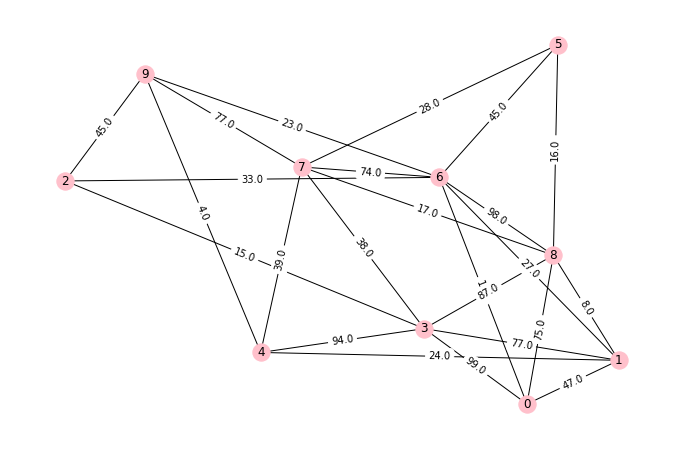

(4, 9)
(9, 6)
(6, 0)
(4, 1)
(1, 8)
(8, 5)
(8, 7)
(6, 2)
(2, 3)
(-1, -1)


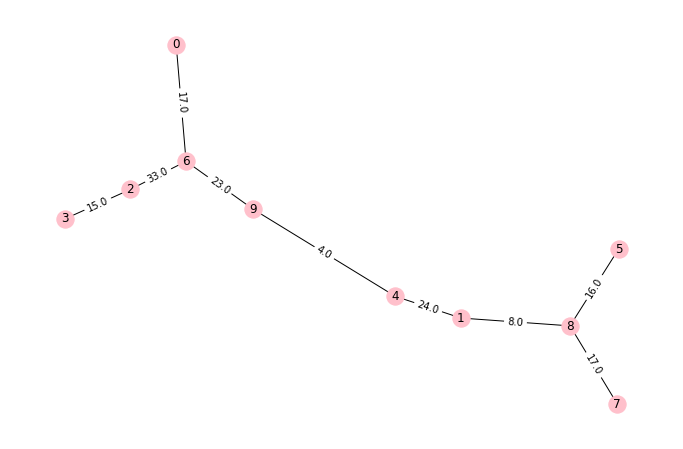

[(4, 9, {'weight': 4.0}), (4, 1, {'weight': 24.0}), (9, 6, {'weight': 23.0}), (6, 0, {'weight': 17.0}), (6, 2, {'weight': 33.0}), (1, 8, {'weight': 8.0}), (8, 5, {'weight': 16.0}), (8, 7, {'weight': 17.0}), (2, 3, {'weight': 15.0})]


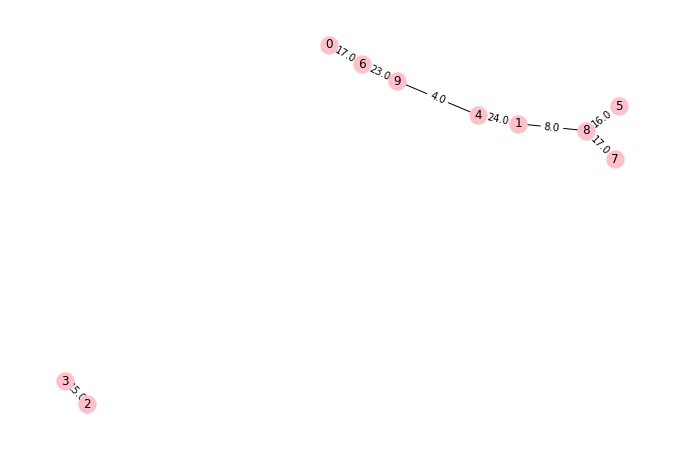

In [32]:
n = 10
data = init_graph(n) 
print(data)
G = nx.from_numpy_matrix(data) 
draw_graph(G)
H = get_min_tree(data)
draw_graph(H)
max_edge = find_max_edge(H)
H.remove_edge(*max_edge)
draw_graph(H)

==